# Modeling Sentiment Analysis - Machine Learning - LC09 (Project)
- Rendra Dwi Prasetyo - 2602199960

In [1]:
# Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer, precision_score, roc_auc_score, f1_score, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
# dataset
df = pd.read_csv("GojekAppReview.csv")

## Exploration Data

In [4]:
df.head(25)

,userName,content,score,at,appVersion
0,Yuga Edit,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3
1,ff burik,Lambat sekali sekarang ini bosssku apk gojek g...,3,2021-11-30 15:40:38,4.9.3
2,Anisa Suci Rahmayuliani,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,2021-11-29 22:58:12,4.9.3
3,naoki yakuza,Baru download gojek dan hape baru trus ditop u...,1,2022-09-03 15:21:17,4.9.3
4,Trio Sugianto,Mantap,5,2022-01-15 10:05:27,4.9.3
5,Arlan Ramlan,Bagus,4,2022-02-01 05:50:40,4.9.3
6,Slamet Hariyanto,Coba dulu,2,2021-12-10 22:40:45,4.9.3
7,Hasan Thio,Ok,5,2022-02-01 03:07:45,4.9.3
8,RAFI BADZLIN,Gimana ini kak pin saya salah terus padahal ud...,1,2022-12-17 08:56:52,4.9.3
9,mariyadi qc,Biar aman kamu tidak bisa pakai gojek Jadi say...,1,2022-02-09 11:27:38,4.9.3


In [5]:
num_rows, num_cols = df.shape
print(f'Number of Rows: {num_rows}')
print(f'Number of Columns: {num_cols}')

Number of Rows: 225002
Number of Columns: 5


In [6]:
# Identify categorical and numerical variables
data_types = df.dtypes
categorical_vars = data_types[data_types == 'object'].index.tolist()
numerical_vars = data_types[(data_types == 'int64') | (data_types == 'float64')].index.tolist()

print('Categorical variables : ',categorical_vars)
print('Numercial variables : ',numerical_vars)

Categorical variables :  ['userName', 'content', 'at', 'appVersion']
Numercial variables :  ['score']


In [7]:
import pandas as pd

# DataFrame to store the results
result_df = pd.DataFrame(columns=["Parameter Check", "Result"])

# Check the number of missing values per column
missing_values = df.isnull().sum().sum()
new_row = pd.DataFrame({"Parameter Check": ["Missing Value"], "Result": [missing_values]})
result_df = pd.concat([result_df, new_row], ignore_index=True)

# Check the number of duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_count = len(duplicate_rows)
new_row = pd.DataFrame({"Parameter Check": ["Duplikasi"], "Result": [duplicate_count]})
result_df = pd.concat([result_df, new_row], ignore_index=True)

# **Finding outliers using the IQR method**
# Select numeric columns only
df_numeric = df.select_dtypes(include=['number'])

# Calculate Q1, Q3, and IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Count the number of outliers
outlier_count = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).sum().sum()
new_row = pd.DataFrame({"Parameter Check": ["Outlier"], "Result": [outlier_count]})
result_df = pd.concat([result_df, new_row], ignore_index=True)

# Counting the number of symbols in the "content" column
if 'content' in df.columns:
    symbol_count = df["content"].str.count(r'[^\w\s]').sum()  # Counts all symbols except alphanumeric characters and spaces
    new_row = pd.DataFrame({"Parameter Check": ["Jumlah Simbol"], "Result": [symbol_count]})
    result_df = pd.concat([result_df, new_row], ignore_index=True)

# Displays the results in a table
print(result_df)


  Parameter Check Result
0   Missing Value      2
1       Duplikasi      0
2         Outlier      0
3   Jumlah Simbol    0.0


**Remove missing values**

In [8]:
df = df.dropna()

In [9]:
df.isna().sum()

userName      0
content       0
score         0
at            0
appVersion    0
dtype: int64

 **Data clear !**

In [10]:
# remove the name column for privacy and to reduce bias
df = df.drop(columns=['userName']);

# df = df.drop(columns=['at']);
df = df.drop(columns=['appVersion']);

# Change the format of the 'at' column to only provide year information
df['at'] = pd.to_datetime(df['at']).dt.year


In [11]:
# check changes
df.head()

,content,score,at
0,akun gopay saya di blok,1,2022
1,Lambat sekali sekarang ini bosssku apk gojek g...,3,2021
2,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,2021
3,Baru download gojek dan hape baru trus ditop u...,1,2022
4,Mantap,5,2022


In [12]:
# Map 1-2 reviews become Negative, 3 become neutral, and 4-5 become Positive.
target_map = {1: 'negative', 2: 'negative', 3: 'neutral', 4: 'positive', 5: 'positive'}
df['target'] = df['score'].map(target_map)



In [13]:
target_counts = df['target'].value_counts()

# print category mapping results
print("Number of positive values (Positive):", target_counts['positive'])
print("Number of Nautral values (Neutral):" , target_counts['neutral'])
print("Number of Negative values (Negative):", target_counts['negative'])

Number of positive values (Positive): 161369
Number of Nautral values (Neutral): 9460
Number of Negative values (Negative): 54171


the data is not balanced on the neutral label so the neutral label will be deleted

In [14]:
df = df.drop(df[df['target'] == 'neutral'].index)

In [15]:
# check whether the label has been deleted
df['target'].unique()

array(['negative', 'positive'], dtype=object)

In [16]:
# map/mapping targets in binary
target_map = {'negative': 0, 'positive' : 1}
df['target_binary'] = df['target'].map(target_map)

In [17]:
df.head()

,content,score,at,target,target_binary
0,akun gopay saya di blok,1,2022,negative,0
2,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,2021,positive,1
3,Baru download gojek dan hape baru trus ditop u...,1,2022,negative,0
4,Mantap,5,2022,positive,1
5,Bagus,4,2022,positive,1


In [19]:
df = df.drop(columns = ['score','at'])

In [20]:
# standardization for column names
df.columns = ['text', 'target','target_binary']

In [21]:
# Checking the different
df.head()

,text,target,target_binary
0,akun gopay saya di blok,negative,0
2,Kenapa sih dari kemarin sy buka aplikasi gojek...,positive,1
3,Baru download gojek dan hape baru trus ditop u...,negative,0
4,Mantap,positive,1
5,Bagus,positive,1


<Axes: xlabel='target', ylabel='count'>

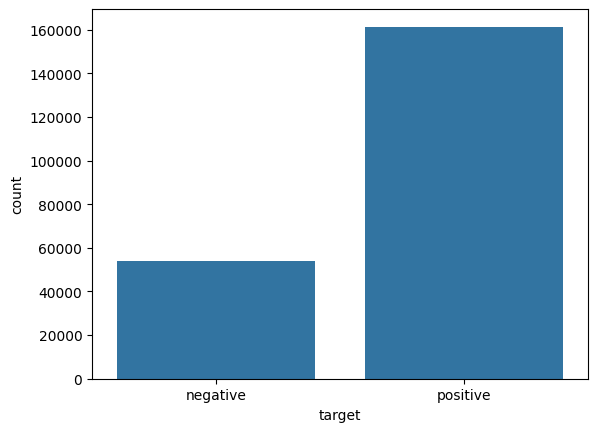

In [22]:
sns.countplot(data=df, x='target')

The comparison ratio between negative and positive labels is not extreme, but I will carry out undersampling by cutting the amount of positive label data for the following reasons:
1. Reduces computing performance burden with lower data
2. To achieve more balanced data because some of the models that I will use (SVM and logistic regression) are quite sensitive to imbalanced data

In [23]:
from sklearn.model_selection import train_test_split

positive_df = df[df['target_binary'] == 1]  # Majority class (Positive)
negative_df = df[df['target_binary'] == 0]  # Minority class (Negative)

# determine the number of samples from the minority class
sample_size = len(negative_df)

# Undersampling majority data until it is balanced with the amount of minority data
undersampled_positive_df = positive_df.sample(n=sample_size, random_state=42)

# Recombine the two classes
balanced_df = pd.concat([undersampled_positive_df, negative_df])

# Randomize the data so that the distribution is random
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"The amount of data after undersampling: {balanced_df['target'].value_counts()}")

The amount of data after undersampling: target
positive    54171
negative    54171
Name: count, dtype: int64


In [24]:
balanced_df.head()

,text,target,target_binary
0,Sangat membantupraktis dan canggihsalam satu a...,positive,1
1,Sangat membantu,positive,1
2,Ycrsa,positive,1
3,Tidak bisa pesan rokok tapi beli KONDOM bisa,negative,0
4,Lamalama mahal pakai biaya aplikasi segala,positive,1


## Text Preprocessing

Install corpus for indonesian language

In [26]:
pip install nlp-id

  Using cached wget-3.2.zip (10 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 4.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/8.1 MB 3.6 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.1 MB 3.2 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.1 MB 3.2 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.1 MB 3.0 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 2.9 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.1 MB 2.8 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.1 MB 2.8 MB/s eta 0:00:02
   ------------------------ --------------- 5.0/8.1 MB 2.8 MB/s eta 0:00:02
   ---------------------------- ----------- 5.8/8.1 MB 2.9 MB/s eta 0:00:01
   ------------------------------

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


In [28]:
pip install indoNLP

Note: you may need to restart the kernel to use updated packages.


In [29]:
import nltk
from nlp_id.lemmatizer import Lemmatizer
from indoNLP.preprocessing import replace_slang, replace_word_elongation

In [53]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [56]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [85]:
lemmatizer = Lemmatizer()

def preprocess_text(text):
    text = lemmatizer.lemmatize(text)
    text = replace_slang(text)
    text = replace_word_elongation(text)
    text = text.strip()
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha()]
    stopwords = nltk.corpus.stopwords.words('indonesian')
    tokens = [token for token in tokens if token not in stopwords]
    return " ".join(tokens)

balanced_df['text_processed'] = balanced_df['text'].apply(preprocess_text)

70% of the data is training data

30% data as test data

In [86]:
# Determine X and Y
X = balanced_df['text_processed']
y = balanced_df['target_binary']

# Split data into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
# TFid to convert data to vector, with 3000 most common words
vectorizer = TfidfVectorizer(max_features=3000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


# Implementation into Machine Learning models

### Support Vector machine (SVM)

In [88]:
# implementation to SVM Model rbf (Radial Basis Function).
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [89]:
print('SVM Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

SVM Model accuracy : 0.916


In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92     16301
           1       0.93      0.90      0.91     16202

    accuracy                           0.92     32503
   macro avg       0.92      0.92      0.92     32503
weighted avg       0.92      0.92      0.92     32503



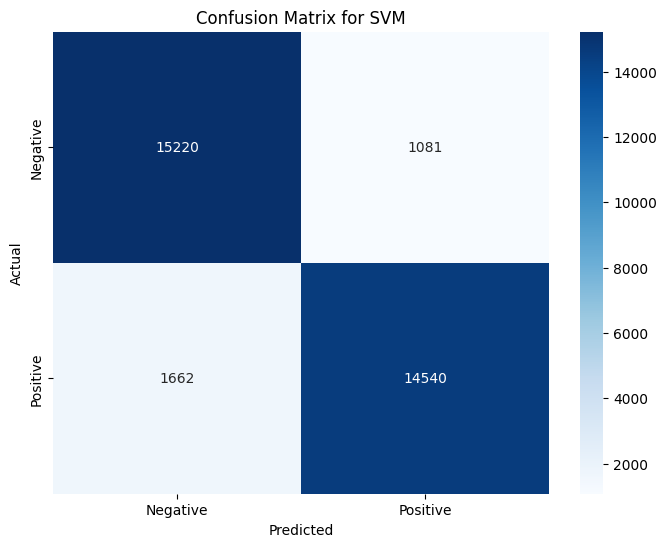

In [91]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

### Naive Bayes

In [92]:
# implementation to the Naive Bayes Model
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [93]:
print('Naive Bayes Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred_nb)))

Naive Bayes Model accuracy : 0.911


In [98]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     16301
           1       0.94      0.88      0.91     16202

    accuracy                           0.91     32503
   macro avg       0.91      0.91      0.91     32503
weighted avg       0.91      0.91      0.91     32503



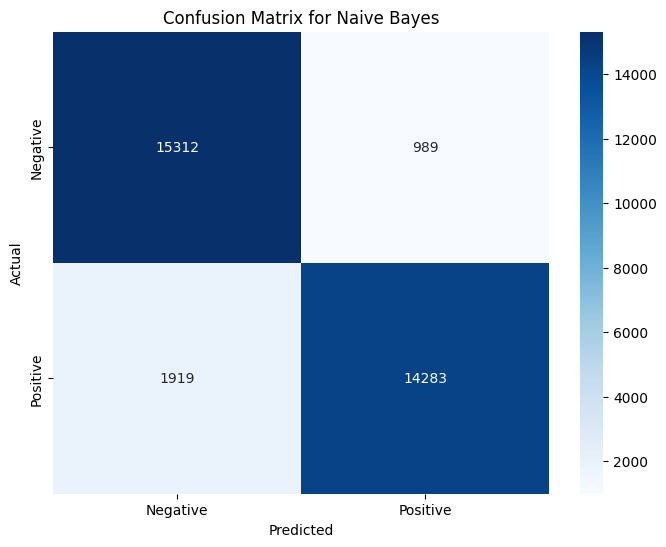

In [95]:
cm2 = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

### Logistic regression

In [96]:
# implementation to the Logistic Regression Model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [97]:
print('Logistic Regression Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred_lr)))

Logistic Regression Model accuracy : 0.913


In [99]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     16301
           1       0.92      0.90      0.91     16202

    accuracy                           0.91     32503
   macro avg       0.91      0.91      0.91     32503
weighted avg       0.91      0.91      0.91     32503



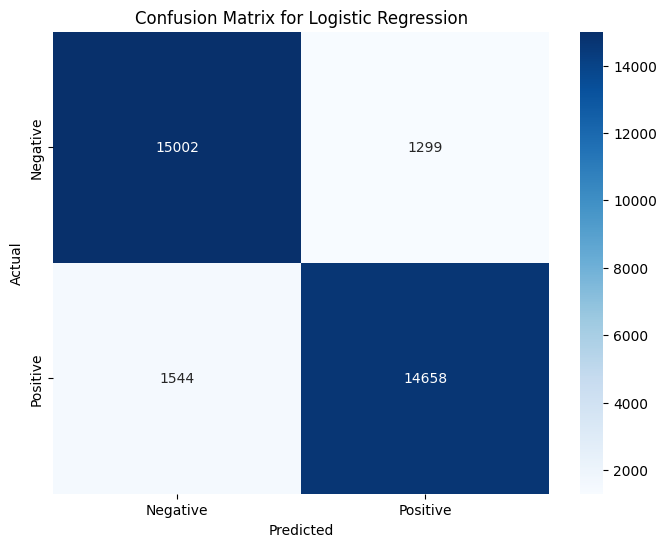

In [104]:
cm3 = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### Random Forest Model

In [101]:
# Implementation to the Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [102]:
print('Random Forest Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred_rf)))

Random Forest Model accuracy : 0.901


In [103]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     16301
           1       0.92      0.88      0.90     16202

    accuracy                           0.90     32503
   macro avg       0.90      0.90      0.90     32503
weighted avg       0.90      0.90      0.90     32503



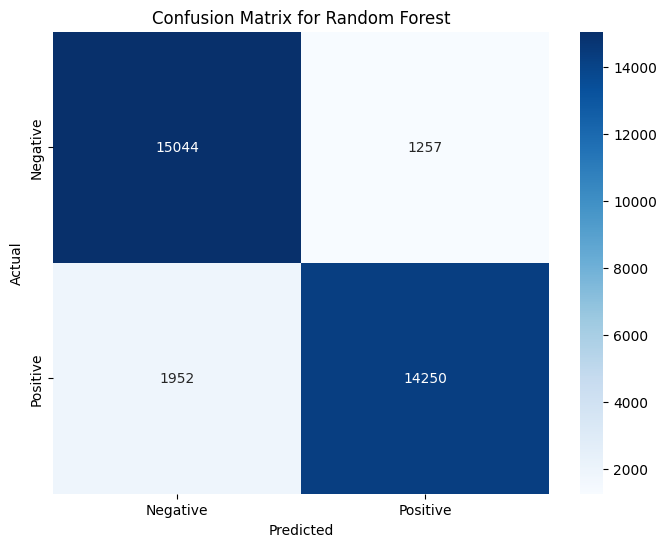

In [105]:
cm4 = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Result

In [106]:
# Accuracy 
print('SVM Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))
print('Naive Bayes Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred_nb)))
print('Logistic Regression Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred_lr)))
print('Random Forest Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred_rf)))

SVM Model accuracy : 0.916
Naive Bayes Model accuracy : 0.911
Logistic Regression Model accuracy : 0.913
Random Forest Model accuracy : 0.901


### For Deployment

In [109]:
# Import pickle 
import pickle

In [110]:
# Save models, vectorizer, and target map to a pickle file
with open('sentiment_models_FULL_new.pkl', 'wb') as file:
    pickle.dump((svc, nb, lr, rf, vectorizer, target_map), file)

print("Models and other components have been saved successfully!")

Models and other components have been saved successfully!


In [112]:
import sys
sys.version

'3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]'

In [115]:
data = {
    'Model': ['SVM', 'Naive Bayes', 'Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)],

    'Precision': [classification_report(y_test, y_pred, output_dict=True)['macro avg']['precision'],
                  classification_report(y_test, y_pred_nb, output_dict=True)['macro avg']['precision'],
                  classification_report(y_test, y_pred_lr, output_dict=True)['macro avg']['precision'],
                  classification_report(y_test, y_pred_rf, output_dict=True)['macro avg']['precision']],
    'Recall': [classification_report(y_test, y_pred, output_dict=True)['macro avg']['recall'],
                  classification_report(y_test, y_pred_nb, output_dict=True)['macro avg']['recall'],
                  classification_report(y_test, y_pred_lr, output_dict=True)['macro avg']['recall'],
                  classification_report(y_test, y_pred_rf, output_dict=True)['macro avg']['recall']],
    'F1-score': [classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score'],
                  classification_report(y_test, y_pred_nb, output_dict=True)['macro avg']['f1-score'],
                  classification_report(y_test, y_pred_lr, output_dict=True)['macro avg']['f1-score'],
                  classification_report(y_test, y_pred_rf, output_dict=True)['macro avg']['f1-score']]
}

comparison_df = pd.DataFrame(data)
comparison_df

,Model,Accuracy,Precision,Recall,F1-score
0,SVM,0.915608,0.916175,0.915553,0.915571
1,Naive Bayes,0.910531,0.911936,0.910443,0.910442
2,Logistic Regression,0.912531,0.912639,0.912507,0.912521
3,Random Forest,0.901271,0.902045,0.901205,0.901212


## Streamlit 

Here The following is a streamlit link resulting from the implementation/deployment of the model that I created in this notebook into my streamlit web environment

[Link Sreamlit Web:](https://sentimentmachinelearning-bzmp29asmq9wu54farn2mv.streamlit.app/) 

https://sentimentmachinelearning-bzmp29asmq9wu54farn2mv.streamlit.app/